# Lab 4.5

Goals:
 
* Compute partial derivatives in sympy. 
* Graph points, functions and planes in 3d
* Explore the relationship between planes and their linearizations


Here are your libraries.


In [ ]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Run this code block to define sympy expressions for several different functions.  Choose a different function that your groupmates. For the remainder of this lab, $f$ refers to your fuinction.

In [ ]:
u=sympy.Symbol('u')
v=sympy.Symbol('v')

f1=u**2*v+v**2-2*u*v #asuka
f2=(u**2*v+5)**0.5
f3=(u*v-2)**3+u
f4=(u-v)**3 # saanvi
f5=v**0.5+0.5*u**2+v #carol
f6=(2*u*v)**0.5-v 

# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Gradescope.

## Q1
Use your code from the prelab to create a 3-dimensional graph that includes
1. The graph of your function
2. The graph of the tangent plane (linearization) at $(2,1)$
3. The point of tangency $(2,1,f(2,1))$

In [ ]:
f_u=sympy.diff(f5,u)
print(f_u)
f_v=sympy.diff(f5,v)
print(f_v)
f_2_1=f5.subs([(u,2),(v,1)])
f_u_2_1=f_u.subs([(u,2),(v,1)])
f_v_2_1=f_v.subs([(u,2),(v,1)])
l=f_2_1+f_u_2_1*(u-2)+f_v_2_1*(v-1)
print(l)

1.0*u
0.5*v**(-0.5) + 1
2.0*u + 1.5*v - 1.5


<string>:2: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  app.launch_new_instance()


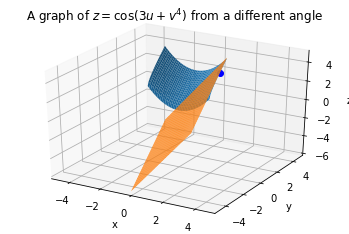

In [ ]:
ffunction=sympy.lambdify([u,v],f5,'numpy')
lfunction=sympy.lambdify([u,v],l,'numpy')

x,y=np.meshgrid(np.arange(-2,2,0.1), np.arange(-2,2,0.1))

z=ffunction(x,y)

ax = plt.axes(projection="3d", xlim=(-5,5), ylim=(-5,5), zlim=(-6,5))

ax.set_title('A graph of $z=\cos(3u+v^4)$ from a different angle')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#1
ax.plot_surface(x,y,z) #graph of f5 (blue)
#2
z1=lfunction(x,y)
ax.plot_surface(x,y,z1) #graph of the tangent plane (orange)
#3
ax.plot3D([2],[1],'bo',zs=ffunction(2,1))

plt.show() 

## Q2

Does your linearization $l(x,y)$ (at $(2,1)$) overestimate or underestimate the values of $f$ at a nearby point in the $x$-direction?

Place the points $(2.5, 1, f(2.5,1))$ and $(2.5, 1, l(2.5,1))$ on a new copy of the graph in Q1. Adjust this graph so that you can clearly see which point is above the other.  You may want to try:
 
1. Changing the range of $z$ values on the axis, so that vertical differences are easier to see
2. Using the `azim` and `elev` keywords to get a good viewing angle.
3. Changing the $x$ or $y$ values in your meshgrid so that pieces of the graph that are in your way are removed.

Then in a sentence or two, indicate whether the linearization overestimates or underestimates $f(2.5,1)$ 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  


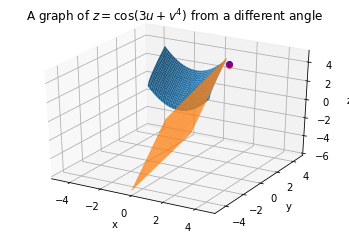

In [ ]:
ax = plt.axes(projection="3d", xlim=(-5,5), ylim=(-5,5), zlim=(-6,5))

ax.set_title('A graph of $z=\cos(3u+v^4)$ from a different angle')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(x,y,z) #graph of f5 (blue)

ax.plot_surface(x,y,z1) #graph of the tangent plane (orange)

ax.plot3D([2.5],[1],'bo',zs=[ffunction(2.5, 1)])
ax.plot3D([2.5],[1],'bo',zs=[lfunction(2.5, 1)],color='red',alpha=0.5)

plt.show() #I tried to use azim and elev to a get a good viewing angle but the points always overlap, but I could see the blue point is slightly above the red point.

The linearization underestimates f(2.5, 1) because the linearization point is below the point of the function.

## Q3

Does your linearization $l(x,y)$ overestimate or underestimate the values of $f$ at a nearby point in the $y$-direction?

Place the points $(2, 1.5, f(2,1.5))$ and $(2, 1.5, l(2,1.5))$ on a new copy of the graph in Q1. Adjust this graph so that you can clearly see which point is above the other.  The suggestions from Q2 should still be useful.

Then in a sentence or two, indicate whether the linearization overestimates or underestimates $f(2,1.5)$ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  


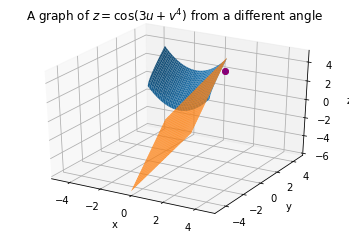

In [ ]:
ax = plt.axes(projection="3d", xlim=(-5,5), ylim=(-5,5), zlim=(-6,5))

ax.set_title('A graph of $z=\cos(3u+v^4)$ from a different angle')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.plot_surface(x,y,z) #graph of f5 (blue)

ax.plot_surface(x,y,z1) #graph of the tangent plane (orange)

ax.plot3D([2],[1.5],'bo',zs=[ffunction(2, 1.5)])
ax.plot3D([2],[1.5],'bo',zs=[lfunction(2, 1.5)],color='red',alpha=0.5)

plt.show() #I tried to use azim and elev to a get a good viewing angle but the points always overlap, but I could see the red point is slightly above the blue point.

The linearization overestimates f(2,1.5) because the linearization point is above the point of the function.

## Q4

In a few sentences, explain which geometric properties of the graph $z=f(x,y)$ determine whether you got overestimates or underestimates in Q2 and Q3.  Cite specific evidence from your groupmates' functions to support your conjecture. Is there a derivative of $f$ which corresponds to this geometric property?  Which one (be specific)?

The concavity of the graph z = f(x,y) determines whether you got overestimates or underestimates in Q2 or Q3. If the 2nd derivative at the point is greater than 0 in x- or y-direction, then f is concave-up at this point, and the linearization is underestimating. If the 2nd derivative is smaller than 0, then f is concave down, and the linearization is overestimating.

For my function, f5, if I take the 2nd derivative at (2,1), I get 1 for the x-direction (underestimate) and -0.25 for the y-direction (overestimate). My groupmates use f1 and f4 and get 2 and 6 for the x-direction (underestimate), and 2 and 6 for the y-direction (underestimate). I also computed the 2nd derivative for f6 and get -0.125 and -0.5, which means the linearizaiton will both overestimate in the x- and y-direction.

In [ ]:
f_u=sympy.diff(f5,u)
f_u_u=sympy.diff(f_u,u)
f_u_u_2_1=f_u_u.subs([(u,2),(v,1)])
print(f_u_u_2_1) #second derivative of x direction

f_v=sympy.diff(f5,v)
f_v_v=sympy.diff(f_v,v) 
f_v_v_2_1=f_v_v.subs([(u,2),(v,1)])
print(f_v_v_2_1) #second derivative of y direction

1.00000000000000
-0.250000000000000


In [ ]:
f_u=sympy.diff(f1,u)
f_u_u=sympy.diff(f_u,u)
f_u_u_2_1=f_u_u.subs([(u,2),(v,1)])
print(f_u_u_2_1) #second derivative of x direction

f_v=sympy.diff(f1,v)
f_v_v=sympy.diff(f_v,v) 
f_v_v_2_1=f_v_v.subs([(u,2),(v,1)])
print(f_v_v_2_1) #second derivative of y direction

2
2


In [ ]:
f_u=sympy.diff(f4,u)
f_u_u=sympy.diff(f_u,u)
f_u_u_2_1=f_u_u.subs([(u,2),(v,1)])
print(f_u_u_2_1) #second derivative of x direction

f_v=sympy.diff(f4,v)
f_v_v=sympy.diff(f_v,v) 
f_v_v_2_1=f_v_v.subs([(u,2),(v,1)])
print(f_v_v_2_1) #second derivative of y direction

6
6


In [ ]:
f_u=sympy.diff(f6,u)
f_u_u=sympy.diff(f_u,u)
f_u_u_2_1=f_u_u.subs([(u,2),(v,1)])
print(f_u_u_2_1) #second derivative of x direction

f_v=sympy.diff(f6,v)
f_v_v=sympy.diff(f_v,v) 
f_v_v_2_1=f_v_v.subs([(u,2),(v,1)])
print(f_v_v_2_1) #second derivative of y direction

-0.125000000000000
-0.500000000000000
